#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the dataset

In [2]:
df = pd.read_csv('Indian_House_Rent_Dataset.csv')

Fill NAN Values With Percentage Function

In [3]:
def fill_NAN_with_percentage(df, col_name):
    value_counts = df[col_name].value_counts(normalize=True)
    nan_indices = df[df[col_name].isna()].index
    fill_values = np.random.choice(value_counts.index, size=len(nan_indices), p=value_counts.values)
    df.loc[nan_indices, col_name] = fill_values
    return df


#### Data Exploration

In [4]:
df.head(10)

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,NaN,2.0,1100.0,NaN,Super Area,Bandel,India-! Kolkata,Unfurnished,Bach^elors/Fam.ily,2.0,Contact Owner,10000
1,2022-05-13,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",India-! Kolkata,Semi-Furnished,Bachelors\/Family*,NaN,NaN,20000
2,2022-05-16,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,India-- Kolkata,Semi-Furnished,NaN,1.0,Contact Owner,17000
3,2022-07-04,2.0,800.0,1 out of 2,Super Area,NaN,NaN,Unfurnished,Bachel]ors/F@amily,1.0,NaN,10000
4,2022-05-09,2.0 room,850.0,1 out of 2,Carpet Area,South Dum Dum,India-^ Kolkata,Unfurnished,Bache[lors&,1.0,Contact Owner,7500
5,2022-04-29,2.0,600.0,Ground out of 1,Super Area,Thakurpukur,India-\ Kolkata,Unfurnished,Bachelors/F}amily+,2.0,Contact Owner,7000
6,2022-06-21,2.0,700.0,Ground out of 4,Super Area,NaN,India-% Kolkata,Unfurnished,Bach@=elors,2.0,Contact Agent,10000
7,2022-06-21,1.0,250.0,1 out of 2,Super Area,Malancha,",-9 Kolkata",Unfurnished,NaN,1.0 Bathrooms,Contact Agent,5000
8,2022-06-07,2.0,NaN,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",NaN,Unfurnished,"?Bachelor,s",2.0,Contact Agent,26000
9,NaN,NaN,1000.0,1 out of 3,Carpet Area,Natunhat,",-9 Kolkata",Semi-Furnished,NaN,2.0,Contact Owner,10000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4084 non-null   object
 1   BHK                3963 non-null   object
 2   Size               3826 non-null   object
 3   Floor              3960 non-null   object
 4   Area Type          3804 non-null   object
 5   Area Locality      4146 non-null   object
 6   City               4091 non-null   object
 7   Furnishing Status  4042 non-null   object
 8   Tenant Preferred   4094 non-null   object
 9   Bathroom           4205 non-null   object
 10  Point of Contact   4137 non-null   object
 11  Rent               4746 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 445.1+ KB


In [6]:
df.shape

(4746, 12)

#### Data Cleaning

Cleaning column "Posted On"

In [7]:
df['Posted On'].value_counts()

Posted On
2022-07-06    265
2022-05-12    129
2022-06-04    120
2022-05-27    110
2022-07-09    109
             ... 
2022-04-25      5
2022-04-24      5
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: count, Length: 81, dtype: int64

In [8]:
df['Posted On'].unique()

array([nan, '2022-05-13', '2022-05-16', '2022-07-04', '2022-05-09',
       '2022-04-29', '2022-06-21', '2022-06-07', '2022-05-23',
       '2022-05-05', '2022-05-17', '2022-06-20', '2022-06-09',
       '2022-06-14', '2022-05-28', '2022-05-22', '2022-06-25',
       '2022-06-22', '2022-05-21', '2022-06-26', '2022-06-16',
       '2022-06-29', '2022-05-10', '2022-05-12', '2022-05-31',
       '2022-06-10', '2022-06-06', '2022-05-20', '2022-07-02',
       '2022-07-03', '2022-04-23', '2022-05-14', '2022-05-27',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-06-24',
       '2022-05-18', '2022-05-30', '2022-06-18', '2022-06-08',
       '2022-05-03', '2022-05-07', '2022-06-27', '2022-04-28',
       '2022-06-28', '2022-06-23', '2022-06-13', '2022-05-15',
       '2022-05-04', '2022-04-25', '2022-05-06', '2022-06-30',
       '2022-07-01', '2022-06-17', '2022-05-26', '2022-05-11',
       '2022-06-12', '2022-06-05', '2022-06-11', '2022-05-25',
       '2022-06-01', '2022-04-30', '2022-05-24', '

In [9]:
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [10]:
df['Month'] = df['Posted On'].dt.month

In [11]:
df['Month'].mode()[0]

np.float64(6.0)

In [12]:
df['Month']=df['Month'].fillna(df['Month'].mode()[0])

In [13]:
df['Month'].isna().sum()

np.int64(0)

In [14]:
df = df.drop('Posted On' , axis=1)

In [15]:
df.head()

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Month
0,2.0,1100.0,NaN,Super Area,Bandel,India-! Kolkata,Unfurnished,Bach^elors/Fam.ily,2.0,Contact Owner,10000,6.0
1,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",India-! Kolkata,Semi-Furnished,Bachelors\/Family*,NaN,NaN,20000,5.0
2,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,India-- Kolkata,Semi-Furnished,NaN,1.0,Contact Owner,17000,5.0
3,2.0,800.0,1 out of 2,Super Area,NaN,NaN,Unfurnished,Bachel]ors/F@amily,1.0,NaN,10000,7.0
4,2.0 room,850.0,1 out of 2,Carpet Area,South Dum Dum,India-^ Kolkata,Unfurnished,Bache[lors&,1.0,Contact Owner,7500,5.0


Cleaning column "BHK"

In [16]:
df['BHK'].unique()

array(['2.0', '2.0 room', '1.0', nan, '3.0', '1.0 room', '6.0', '4.0',
       '3.0 room', '5.0', '5.0 room', '4.0 room', '6.0 room'],
      dtype=object)

In [17]:
df['BHK'].isna().sum()

np.int64(783)

In [18]:
df['BHK']=df['BHK'].str.replace('[a-zA-Z]' , "" , regex=True).str.strip()

In [19]:
df['BHK'] = df['BHK'].astype('float')

In [20]:
df['BHK'] = df['BHK'].fillna(df['BHK'].median())

In [21]:
df['BHK'].isna().sum()

np.int64(0)

In [22]:
df.head()

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Month
0,2.0,1100.0,NaN,Super Area,Bandel,India-! Kolkata,Unfurnished,Bach^elors/Fam.ily,2.0,Contact Owner,10000,6.0
1,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",India-! Kolkata,Semi-Furnished,Bachelors\/Family*,NaN,NaN,20000,5.0
2,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,India-- Kolkata,Semi-Furnished,NaN,1.0,Contact Owner,17000,5.0
3,2.0,800.0,1 out of 2,Super Area,NaN,NaN,Unfurnished,Bachel]ors/F@amily,1.0,NaN,10000,7.0
4,2.0,850.0,1 out of 2,Carpet Area,South Dum Dum,India-^ Kolkata,Unfurnished,Bache[lors&,1.0,Contact Owner,7500,5.0


Cleaning column "Size"

In [23]:
df['Size'].unique()

array(['1100.0', '800.0', '1000.0', '850.0', '600.0', '700.0', '250.0',
       nan, '1200.0', '400.0', '375.0', '900.0', '1286.0', '2000.0',
       '650.0', '300.0', '1600.0', '355.0', '350.0', '550.0', '500.0',
       '630.0', '270.0', '1500.0', '1068.0', '150.0', '450.0', '720.0',
       '680.0', '950.0', '1800.0', '480.0', '435.0', '1300.0', '1450.0',
       '750.0', '220.0', '20.0', '200.0', '840.0', '740.0', '490.0',
       '280.0', '120.0', '1220.0', '670.0', '240.0', '2200.0', '685.0',
       '44.0', '392.0', '710.0', '1400.0', '160.0', '1250.0', '839.0',
       '230.0', '620.0', '1350.0Square Feet', '723.0', '320.0', '2160.0',
       '1700.0', '130.0', '505.0', '4000.0', '1190.0', '1012.0', '812.0',
       '420.0', '1750.0', '830.0', '1050.0', '960.0', '756.0', '288.0',
       '1600.0Square Feet', '986.0', '322.0', '957.0', '1430.0', '1320.0',
       '650.0Square Feet', '475.0', '550.0Square Feet', '570.0', '460.0',
       '530.0', '850.0Square Feet', '558.0', '175.0', '721.0',

In [24]:
df['Size']=df['Size'].str.replace('[a-zA-Z]' , "" , regex=True).str.strip()

In [25]:
df['Size'] = df['Size'].astype('float')

In [26]:
df['Size'] = df['Size'].fillna(df['Size'].median())

In [27]:
df['Size'].isna().sum()

np.int64(0)

Cleaning column "Floor"

In [28]:
df['Floor'].unique()

array([nan, '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 2',
       'Ground out of 3', '2 out of 3', '4 out of 5', '2 out of 2',
       '2 out of 5', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       'Ground out of 6', 'Upper Basement out of 4', 'Ground out of 5',
       '3 out of 5', '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '18 out of 24', '3 out of 7', '17 out of 31', '11 out of 21',
       '14 out of 23', '19 out of 24', '3 out of 21', '8 out of 8',
       '6 out of 12', '4 out of 58', '60 out of 66', '34 out of 48',
       '5 out of 8', '14 out of 40', '5 out of 7', '26 out of 44',
       '1 out of 8', '25 out of 42', '25 out of 41', '53 out of 

In [29]:
df = df.drop('Floor' , axis=1)

Cleaning column "Area Type"

In [30]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', nan, 'CARPET AREA', 'SUPER AREA',
       'Built Area'], dtype=object)

In [31]:
df['Area Type'] = df['Area Type'].str.lower()

In [32]:
df['Area Type'].unique()

array(['super area', 'carpet area', nan, 'built area'], dtype=object)

In [33]:
df['Area Type'].isna().sum()

np.int64(942)

In [34]:
df['Area Type'].value_counts()

Area Type
super area     1978
carpet area    1824
built area        2
Name: count, dtype: int64

In [35]:
df = fill_NAN_with_percentage(df ,'Area Type' )

In [36]:
df['Area Type'].isna().sum()

np.int64(0)

Cleaning column "Area Locality"

Cleaning column "City"

In [37]:
df['City'].unique()

array(['India-! Kolkata', 'India-- Kolkata', nan, 'India-^ Kolkata',
       'India-\\ Kolkata', 'India-% Kolkata', ',-9 Kolkata',
       'India-/ Kolkata', '(-9 Kolkata', '^-9 Kolkata', '--9 Kolkata',
       'India-* Kolkata', 'India-; Kolkata', 'India-. Kolkata',
       '!-9 Kolkata', ':-9 Kolkata', '\\-9 Kolkata', ';-9 Kolkata',
       'India-> Kolkata', '.-9 Kolkata', 'India-@ Kolkata',
       'India-{ Kolkata', 'India-[ Kolkata', 'India-| Kolkata',
       'India-} Kolkata', '"-9 Kolkata', '|-9 Kolkata', "'-9 Kolkata",
       '>-9 Kolkata', 'India-? Kolkata', '}-9 Kolkata', '#-9 Kolkata',
       'India-$ Kolkata', ']-9 Kolkata', 'India-< Kolkata', '$-9 Kolkata',
       'India-] Kolkata', '<-9 Kolkata', 'India-: Kolkata',
       'India-# Kolkata', 'India-+ Kolkata', '+-9 Kolkata',
       'India-& Kolkata', 'India-, Kolkata', '%-9 Kolkata',
       'India-( Kolkata', 'India-_ Kolkata', '@-9 Kolkata', '=-9 Kolkata',
       'India-" Kolkata', '/-9 Kolkata', '_-9 Kolkata', '?-9 Kolkata',


In [38]:
df['City'].value_counts()

City
India-, Mumbai       24
India-( Bangalore    23
India-( Chennai      22
--9 Mumbai           22
India-\ Mumbai       22
                     ..
%-9 Delhi             4
"-9 Kolkata           4
'-9 Kolkata           4
India-/ Kolkata       3
<-9 Kolkata           3
Name: count, Length: 360, dtype: int64

In [39]:
df['City'] = df['City'].str.replace('[^a-zA-Z]' , '' , regex=True)
df['City'] = df['City'].str.replace('India' , '' , regex=True)

In [40]:
df['City'].unique()

array(['Kolkata', nan, 'Mumbai', 'Bangalore', 'Delhi', 'Chennai',
       'Hyderabad'], dtype=object)

In [41]:
df['City'].isna().sum()

np.int64(655)

In [42]:
df = fill_NAN_with_percentage(df ,'City' )

In [43]:
df['City'].isna().sum()

np.int64(0)

Cleaning column "Furnishing Status"

In [44]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [45]:
df['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    1908
Unfurnished       1555
Furnished          579
Name: count, dtype: int64

In [46]:
df = fill_NAN_with_percentage(df ,'Furnishing Status' )

In [47]:
df['Furnishing Status'].isna().sum()

np.int64(0)

Cleaning column "Tenant Preferred"

In [48]:
df['Tenant Preferred'].unique()

array(['Bach^elors/Fam.ily', 'Bachelors\\/Family*', nan, ...,
       '!Bachelors+/Family', '$Family%', 'Bachelo%rs:'],
      shape=(4052,), dtype=object)

In [49]:
df['Tenant Preferred'] = df['Tenant Preferred'].str.replace('[^a-zA-Z]' , '' , regex=True)

In [50]:
df['Tenant Preferred'].unique()

array(['BachelorsFamily', nan, 'Bachelors', 'Family'], dtype=object)

In [51]:
df = fill_NAN_with_percentage(df ,'Tenant Preferred' )

In [52]:
df['Tenant Preferred'].isna().sum()

np.int64(0)

Cleaning column "Bathroom"

In [53]:
df['Bathroom'].unique()

array(['2.0', nan, '1.0', '1.0 Bathrooms', '2.0 Bathrooms', '3.0', '4.0',
       '5.0', '3.0 Bathrooms', '5.0 Bathrooms', '6.0', '4.0 Bathrooms',
       '7.0', '10.0'], dtype=object)

In [54]:
df['Bathroom'] = df['Bathroom'].str.replace('[a-zA-Z]' ,'', regex=True).str.strip()

In [55]:
df['Bathroom'] = df['Bathroom'].astype('float')

In [56]:
df['Bathroom'].isna().sum()

np.int64(541)

In [57]:
df = fill_NAN_with_percentage(df ,'Bathroom' )

In [58]:
df['Bathroom'].isna().sum()

np.int64(0)

In [59]:
df['Bathroom'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7., 10.])

Cleaning column "Point of Contact"

In [60]:
df['Point of Contact'].unique()

array(['Contact Owner', nan, 'Contact Agent'], dtype=object)

In [61]:
df['Point of Contact'].isna().sum()

np.int64(609)

In [62]:
df = fill_NAN_with_percentage(df ,'Point of Contact' )

In [63]:
df['Point of Contact'].isna().sum()

np.int64(0)

### EDA
- Try to comeout with insights and relations 
- also give attention to the look and style of your visuals

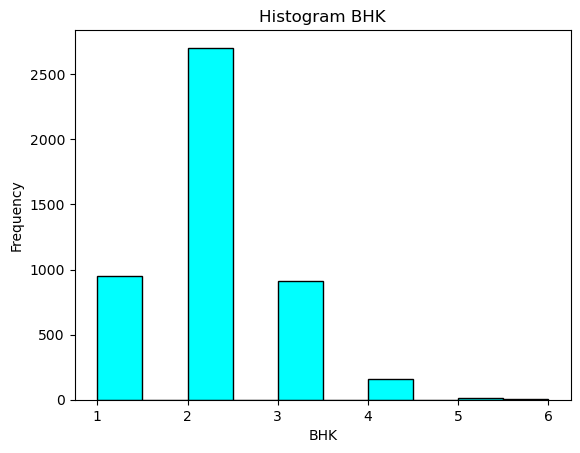

In [64]:
num_var = df[['BHK', 'Rent', 'Size']]

plt.hist(num_var['BHK'], bins=10, color='cyan', edgecolor='black')

plt.xlabel('BHK')
plt.ylabel('Frequency')

plt.title('Histogram BHK')

plt.show()

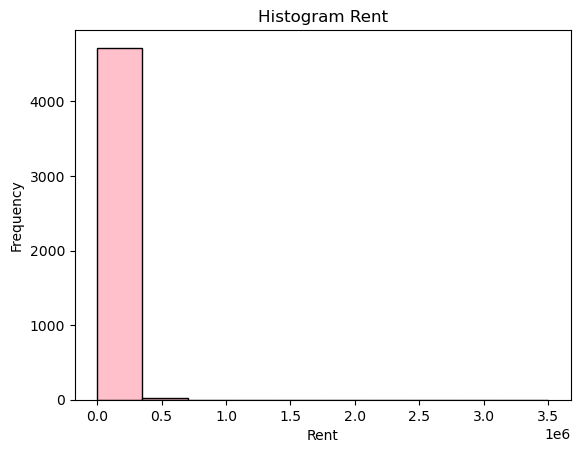

In [65]:
plt.hist(num_var['Rent'], bins=10, color='pink', edgecolor='black')

plt.xlabel('Rent')
plt.ylabel('Frequency')

plt.title('Histogram Rent')

plt.show()

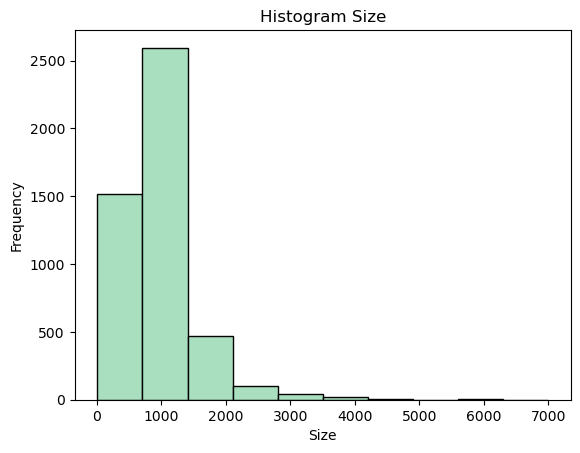

In [66]:
plt.hist(num_var['Size'], bins=10, color='#A9DFBF', edgecolor='black')

plt.xlabel('Size')
plt.ylabel('Frequency')

plt.title('Histogram Size')

plt.show()

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

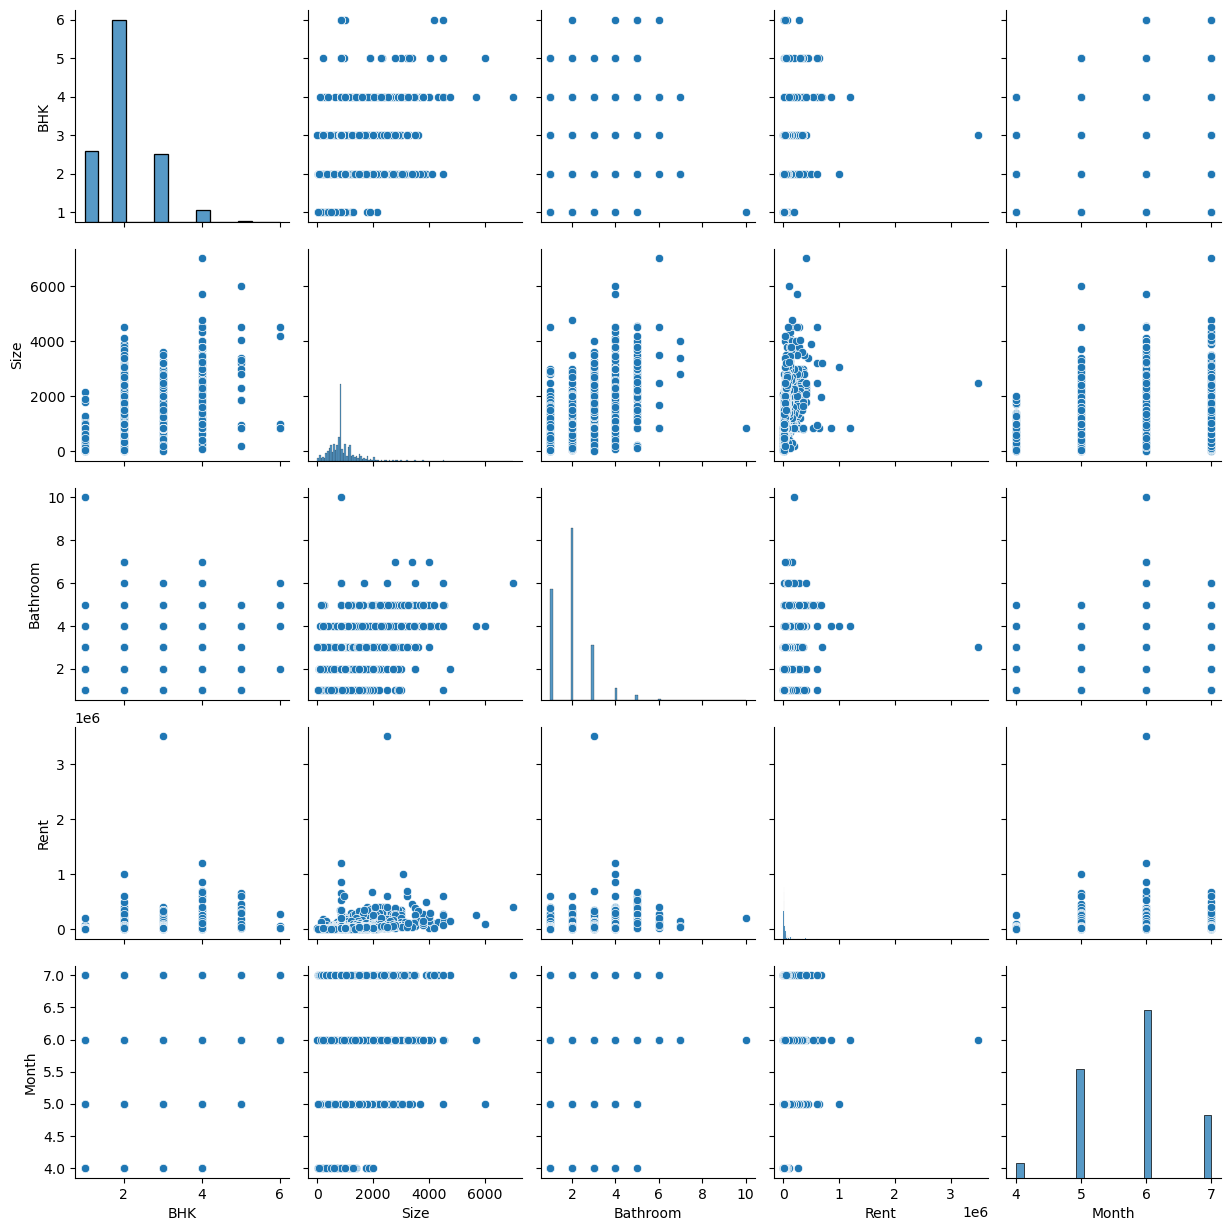

In [67]:
sns.pairplot(df)

### Feature Engineering 
- Start with Encoding Categorical Features
- Try the following techniques :
    - one-hot-encoding VS dummy encoding (write a summary about your observations)
    - if let's say the encoding will generate a huge amount of columns try to limit the columns count

In [68]:
df_encoded = pd.get_dummies(df , columns=df.select_dtypes(include='object').columns ,dtype='int' ,prefix='NEW')
df_encoded 


,BHK,Size,Bathroom,Rent,Month,NEW_built area,NEW_carpet area,NEW_super area,"NEW_ Beeramguda, Ramachandra Puram, NH 9","NEW_ in Boduppal, NH 2 2",...,NEW_Kolkata,NEW_Mumbai,NEW_Furnished,NEW_Semi-Furnished,NEW_Unfurnished,NEW_Bachelors,NEW_BachelorsFamily,NEW_Family,NEW_Contact Agent,NEW_Contact Owner
0,2.0,1100.0,2.0,10000,6.0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
1,2.0,800.0,2.0,20000,5.0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
2,2.0,1000.0,1.0,17000,5.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
3,2.0,800.0,1.0,10000,7.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
4,2.0,850.0,1.0,7500,5.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2.0,1000.0,2.0,15000,5.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4742,3.0,2000.0,3.0,29000,6.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4743,2.0,1750.0,3.0,35000,7.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4744,2.0,1500.0,2.0,45000,7.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [69]:
df_encoded['Bathroom'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7., 10.])

In [70]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=4)
df_encoded['Bathroom'] = binarizer.fit_transform(df_encoded[['Bathroom']])

In [71]:
df_encoded['Bathroom'].value_counts()

Bathroom
0.0    4672
1.0      74
Name: count, dtype: int64

- Now let's take a look at Numeric Features
- Try the following techniques (if possible) :
    - Binarizing numeric variables
    - Binning numeric variables

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Size', ylabel='Density'>

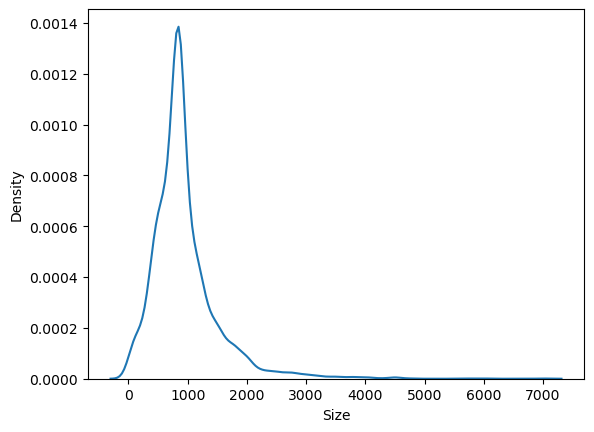

In [72]:
sns.kdeplot(df['Size'])

In [73]:
size_bins = [0 , 700 , 1500 , 4000 , 7800]
size_labels = ['small' , 'medium' , 'large' , 'huge']
df['size_binned'] = pd.cut(df['Size'] , bins =size_bins , labels=size_labels )

### Generating New Features 
- Try to Generate new features that seems helpful :
    - maybe the ratio between the floor and total number of floors
    - or the avarge size of a room 

### Scaling and transformations
- Try these techniques:
    - Min-Max scaling
    - Standardization

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Count'>

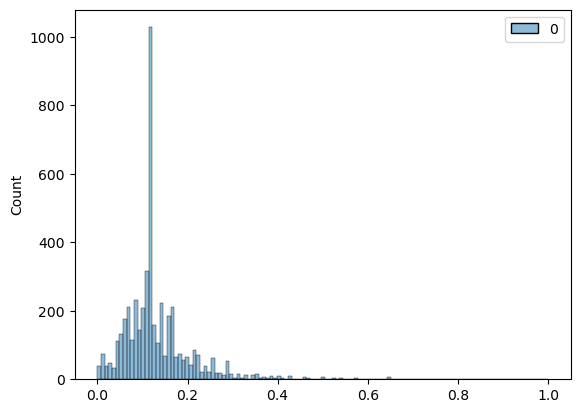

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minimax = MinMaxScaler()
scaled = minimax.fit_transform(df[['Size']])

sns.histplot(scaled)

### Outliers
- after scaling and standarising is there any outliers
- if there is try to deal with them
you may need this code snippet:

```python
    mean = df['col_name'].mean()
    std = df['col_name'].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df['col_name'] < upper) & (df['col_name'] > lower)]
```

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

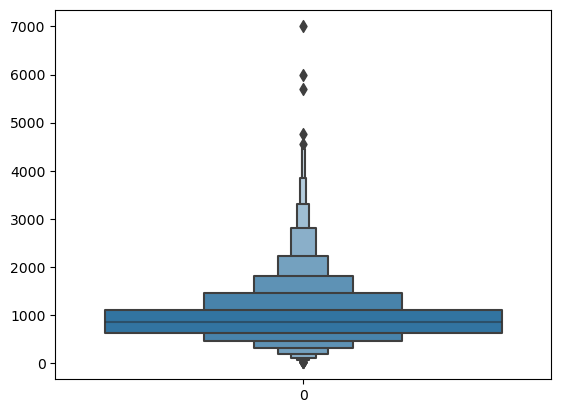

In [75]:
sns.boxenplot(df['Size'])

In [76]:
size_mean = df['Size'].mean()
size_std = df['Size'].std()
cut_off = size_std *3
lower = size_mean - cut_off
upper = size_mean + cut_off
final_df = df[(df['Size'] < upper) & (df['Size'] > lower)]

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

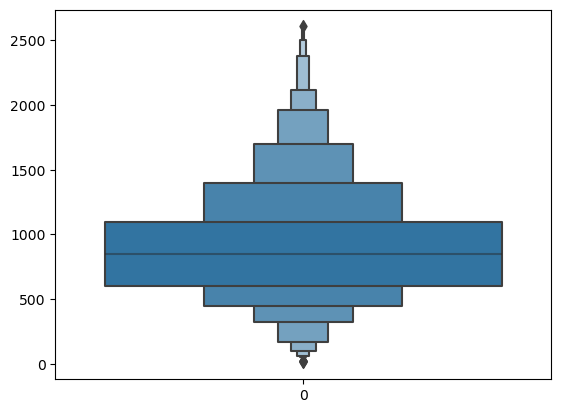

In [77]:
sns.boxenplot(final_df['Size'])

Finally feel free to get creative and have many experiments as you like :)